In [ ]:
import pandas as pd
import numpy as np
import io
import statistics
import seaborn as sns


In [ ]:
df=pd.read_csv('Mall_Customers.csv')
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [ ]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
statistics.mode(df['Age'])


32

In [ ]:
statistics.mean(df['Annual Income (k$)'])


60.56

In [ ]:
statistics.median(df['Age'])


36.0

In [ ]:
df[['Age', 'Annual Income (k$)']].groupby('Age').describe()


Annual Income (k$)                                                      \
                 count        mean        std   min     25%    50%     75%   
Age                                                                          
18                 4.0   51.250000  14.056434  33.0   44.25   53.5   60.50   
19                 8.0   57.000000  20.632845  15.0   47.50   63.5   67.25   
20                 5.0   41.600000  24.815318  16.0   21.00   37.0   61.00   
21                 5.0   38.800000  19.018412  15.0   30.00   33.0   54.00   
22                 3.0   31.333333  22.278540  17.0   18.50   20.0   38.50   
23                 6.0   41.500000  23.441416  16.0   20.75   41.5   60.00   
24                 4.0   39.250000  16.357975  20.0   33.50   38.5   44.25   
25                 3.0   57.666667  29.263174  24.0   48.00   72.0   74.50   
26                 2.0   58.000000   5.656854  54.0   56.00   58.0   60.00   
27                 6.0   63.166667  18.400181  40.0   49.50   63.5   75.25   
28                 4.0   85.250000  11.615363  76.0   76.75   82.0   90.50   
29                 5.0   63.600000  28.866936  28.0   40.00   73.0   79.00   
30                 7.0   76.142857  39.612408  19.0   56.00   78.0   93.50   
31                 8.0   48.375000  23.323425  17.0   35.50   41.5   70.50   
32                11.0   87.181818  26.809768  48.0   74.00   77.0  100.00   
33                 3.0   80.333333  35.837597  42.0   64.00   86.0   99.50   
34                 5.0   79.000000  15.968719  58.0   78.00   78.0   78.00   
35                 9.0   46.666667  38.632888  18.0   21.00   24.0   74.00   
36                 6.0   81.000000  22.556595  37.0   85.50   87.0   87.00   
37                 3.0   65.000000  40.112342  20.0   49.00   78.0   87.50   
38                 6.0   74.500000  20.462160  54.0   64.75   69.0   76.25   
39                 3.0   72.666667   4.725816  69.0   70.00   71.0   74.50   
40                 6.0   61.666667  19.551641  29.0   55.50   64.5   70.50   
41                 2.0  101.000000   2.828427  99.0  100.00  101.0  102.00   
42                 2.0   60.000000  36.769553  34.0   47.00   60.0   73.00   
43                 3.0   65.666667  15.695010  48.0   59.50   71.0   74.50   
44                 2.0   75.500000   3.535534  73.0   74.25   75.5   76.75   
45                 3.0   69.333333  50.767444  28.0   41.00   54.0   90.00   
46                 3.0   59.000000  36.755952  25.0   39.50   54.0   76.00   
47                 6.0   70.166667  27.694163  43.0   51.75   65.5   76.25   
48                 5.0   58.200000  13.700365  39.0   54.00   60.0   61.00   
49                 7.0   51.000000  12.884099  33.0   40.50   54.0   62.00   
50                 5.0   58.600000  18.420098  40.0   43.00   58.0   67.00   
51                 2.0   55.500000  16.263456  44.0   49.75   55.5   61.25   
52                 2.0   55.500000  45.961941  23.0   39.25   55.5   71.75   
53                 2.0   39.500000   9.192388  33.0   36.25   39.5   42.75   
54                 4.0   59.750000  30.998656  28.0   42.25   55.0   72.50   
55                 1.0   57.000000        NaN  57.0   57.00   57.0   57.00   
56                 1.0   79.000000        NaN  79.0   79.00   79.0   79.00   
57                 2.0   64.500000  14.849242  54.0   59.25   64.5   69.75   
58                 2.0   54.000000  48.083261  20.0   37.00   54.0   71.00   
59                 4.0   65.250000  21.792583  43.0   51.25   62.5   76.50   
60                 3.0   43.333333  11.547005  30.0   40.00   50.0   50.00   
63                 2.0   56.500000  12.020815  48.0   52.25   56.5   60.75   
64                 1.0   19.000000        NaN  19.0   19.00   19.0   19.00   
65                 2.0   50.500000  17.677670  38.0   44.25   50.5   56.75   
66                 2.0   63.000000   0.000000  63.0   63.00   63.0   63.00   
67                 4.0   45.500000  18.699376  19.0   40.00   50.5   56.00   
68                 3.0   5

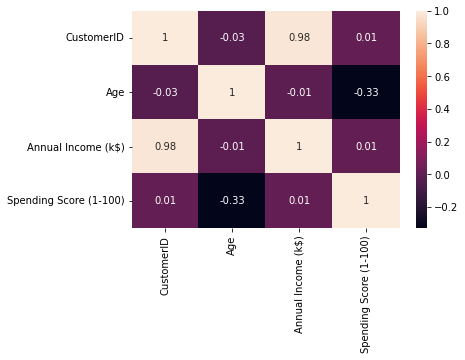

In [ ]:
my_var=df.corr().round(2)
sns.heatmap(data=my_var,annot=True)


In [ ]:
df.groupby('Age').agg({'Annual Income (k$)':['mean','min','max']})


Annual Income (k$)         
                  mean min  max
Age                            
18           51.250000  33   65
19           57.000000  15   81
20           41.600000  16   73
21           38.800000  15   62
22           31.333333  17   57
23           41.500000  16   70
24           39.250000  20   60
25           57.666667  24   77
26           58.000000  54   62
27           63.166667  40   88
28           85.250000  76  101
29           63.600000  28   98
30           76.142857  19  137
31           48.375000  17   81
32           87.181818  48  137
33           80.333333  42  113
34           79.000000  58  103
35           46.666667  18  120
36           81.000000  37  103
37           65.000000  20   97
38           74.500000  54  113
39           72.666667  69   78
40           61.666667  29   87
41          101.000000  99  103
42           60.000000  34   86
43           65.666667  48   78
44           75.500000  73   78
45           69.333333  28  126
46           59.000000  25   98
47           70.166667  43  120
48           58.200000  39   77
49           51.000000  33   65
50           58.600000  40   85
51           55.500000  44   67
52           55.500000  23   88
53           39.500000  33   46
54           59.750000  28  101
55           57.000000  57   57
56           79.000000  79   79
57           64.500000  54   75
58           54.000000  20   88
59           65.250000  43   93
60           43.333333  30   50
63           56.500000  48   65
64           19.000000  19   19
65           50.500000  38   63
66           63.000000  63   63
67           45.500000  19   62
68           56.666667  48   63
69           44.000000  44   44
70           47.500000  46   49